# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Had to create this script since it didn't want to read the original starter code file path
# to export and save
import os
if not os.path.exists("output_data"):
    os.makedirs("output_data")

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations|
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
#Used an example from class to create this URL, its cleaner and easier to use
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # Appending each city's name to the query URL, makes an API request for each city
    city_url = f"{query_url}{city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aasiaat
Processing Record 2 of Set 1 | hawaiian paradise park
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | berdigestyakh
Processing Record 6 of Set 1 | helena valley west central
Processing Record 7 of Set 1 | val-d'or
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | akureyri
Processing Record 11 of Set 1 | kingston
Processing Record 12 of Set 1 | tamanrasset
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | island harbour
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | porto velho
Processing Record 17 of Set 1 | lagunas
Processing Record 18 of Set 1 | happy valley-goose bay
Processing Record 19 of Set 1 | petropavlovsk-kamchatsky
Processing Record 20 of Set 1 | kapuskasing


In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aasiaat,68.7098,-52.8699,-18.62,88,39,2.72,GL,1730174453
1,hawaiian paradise park,19.5933,-154.9731,24.39,96,100,3.67,US,1730174314
2,blackmans bay,-43.0167,147.3167,21.07,47,13,2.70,AU,1730174268
3,ribeira grande,38.5167,-28.7000,18.21,69,45,3.42,PT,1730174366
4,berdigestyakh,62.0989,126.6992,-10.73,91,100,1.76,RU,1730174458


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,-18.62,88,39,2.72,GL,1730174453
1,hawaiian paradise park,19.5933,-154.9731,24.39,96,100,3.67,US,1730174314
2,blackmans bay,-43.0167,147.3167,21.07,47,13,2.70,AU,1730174268
3,ribeira grande,38.5167,-28.7000,18.21,69,45,3.42,PT,1730174366
4,berdigestyakh,62.0989,126.6992,-10.73,91,100,1.76,RU,1730174458


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

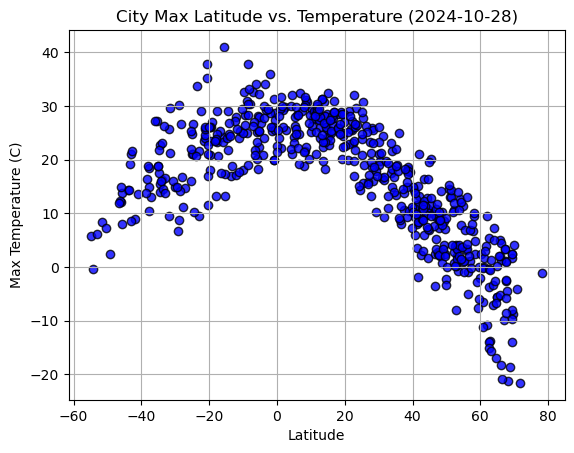

In [21]:
# Build scatter plot for latitude vs. temperature
# Went back to the top to import datetime to allow this and the next
# Plots to have the current date as shown in the examples, made a variable to call it
# In a formatted string 
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor="blue", edgecolor="black", linewidths=1, marker="o", alpha=0.8)
date = datetime.today().date()

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

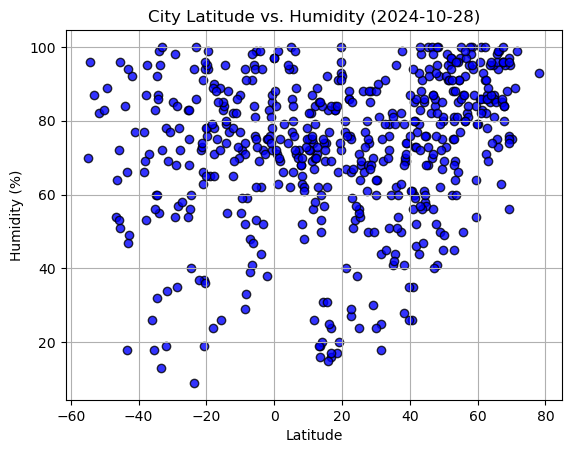

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor="blue", edgecolor="black", linewidths=1, marker="o", alpha=0.8)
date = datetime.today().date()

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

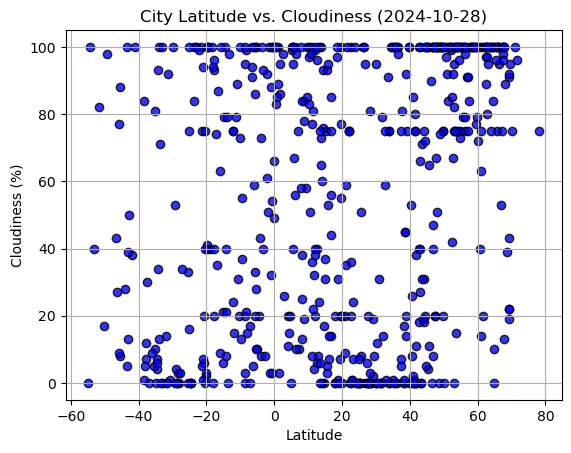

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor="blue", edgecolor="black", linewidths=1, marker="o", alpha=0.8)
date = datetime.today().date()


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

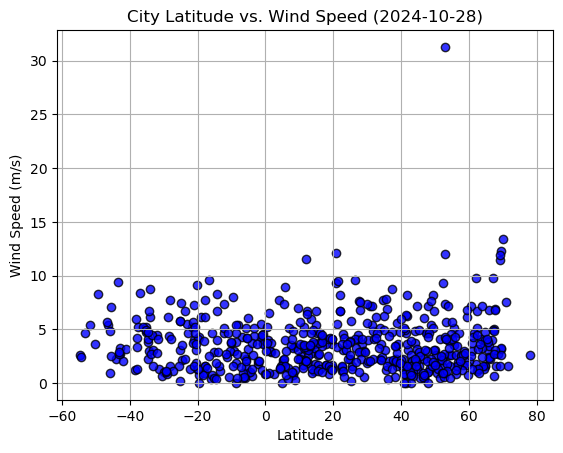

In [30]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor="blue", edgecolor="black", linewidths=1, marker="o", alpha=0.8)
date = datetime.today().date()


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
# Used the following as references: https://docs.scipy.org/doc/scipy/reference/
# generated/scipy.stats.linregress.html, https://matplotlib.org/stable/tutorials/pyplot.html
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    plt.scatter(x_values, y_values, edgecolor="black", facecolor="blue", alpha=0.8)

    regress_values = slope * x_values + intercept
    plt.plot(x_values, regress_values, "r-")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    r_squared = r_value**2
    plt.text(min(x_values), min(y_values),
             f"y = {slope:.2f}x + {intercept:.2f}",
            fontsize=10, color="red")
    print("The r2-value is:", r_squared)
    plt.show()

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,-18.62,88,39,2.72,GL,1730174453
1,hawaiian paradise park,19.5933,-154.9731,24.39,96,100,3.67,US,1730174314
3,ribeira grande,38.5167,-28.7000,18.21,69,45,3.42,PT,1730174366
4,berdigestyakh,62.0989,126.6992,-10.73,91,100,1.76,RU,1730174458
5,helena valley west central,46.6629,-112.0604,2.49,70,0,0.45,US,1730174463


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,blackmans bay,-43.0167,147.3167,21.07,47,13,2.7,AU,1730174268
7,adamstown,-25.0660,-130.1015,21.05,75,16,3.1,PN,1730174278
13,port-aux-francais,-49.3500,70.2167,2.48,89,98,8.3,TF,1730174313
14,porto velho,-8.7619,-63.9039,25.03,94,0,0.0,BR,1730174395
15,lagunas,-5.2269,-75.6753,22.43,99,100,0.9,PE,1730174476


###  Temperature vs. Latitude Linear Regression Plot

The r2-value is: 0.7990505475971247


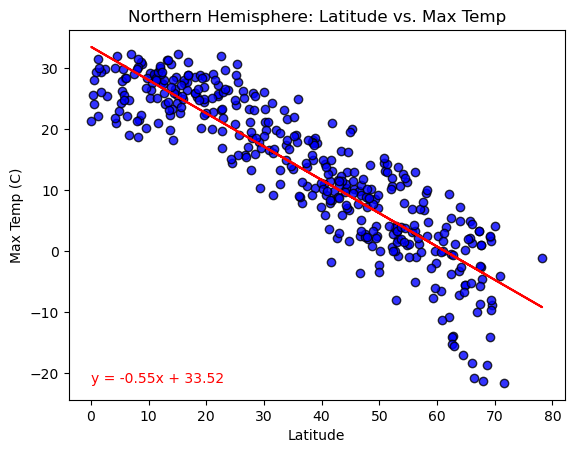

In [40]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Max Temp"],
                       "Latitude",
                       "Max Temp (C)",
                       "Northern Hemisphere: Latitude vs. Max Temp")


The r2-value is: 0.44109039952474743


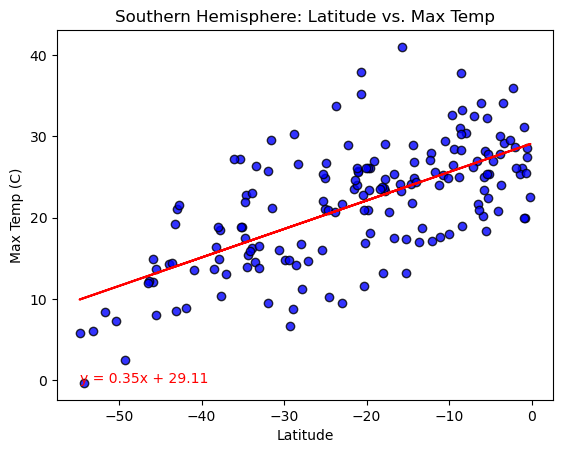

In [42]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Max Temp"],
                       "Latitude",
                       "Max Temp (C)",
                       "Southern Hemisphere: Latitude vs. Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r2-value is: 0.10183223256390488


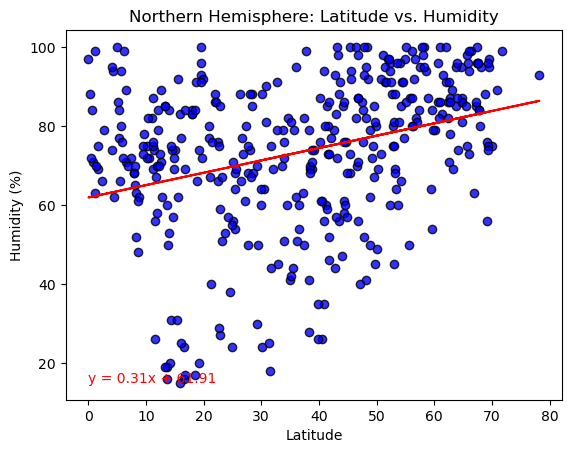

In [46]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Humidity"],
                       "Latitude",
                       "Humidity (%)",
                       "Northern Hemisphere: Latitude vs. Humidity")

The r2-value is: 0.005130889613570052


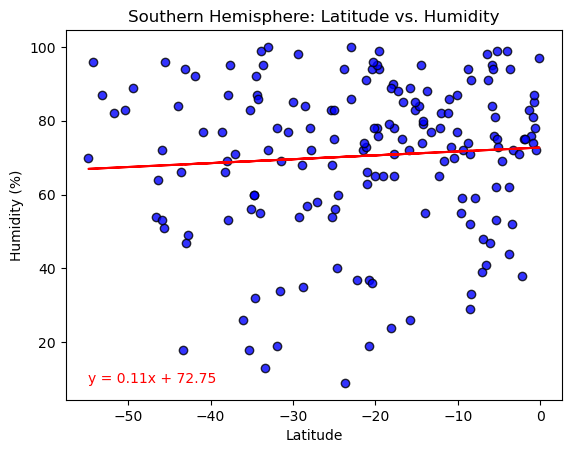

In [48]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Humidity"],
                       "Latitude",
                       "Humidity (%)",
                       "Southern Hemisphere: Latitude vs. Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r2-value is: 0.08424104914952843


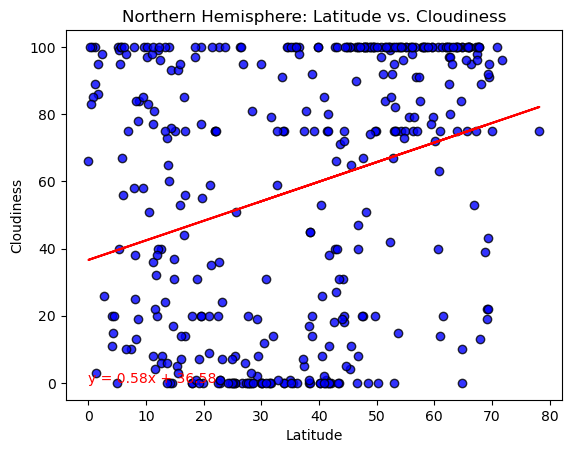

In [52]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Cloudiness"],
                       "Latitude",
                       "Cloudiness",
                       "Northern Hemisphere: Latitude vs. Cloudiness")

The r2-value is: 0.02649831190288553


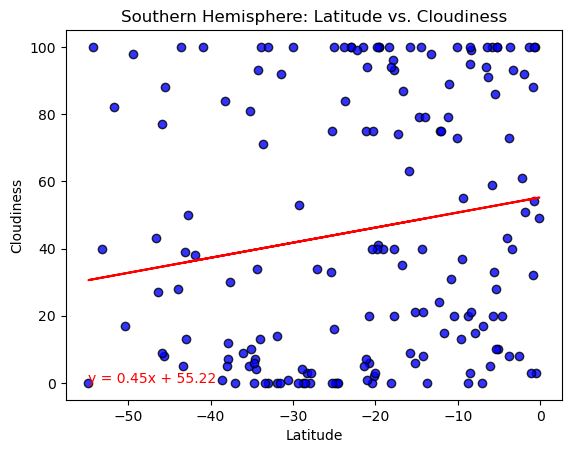

In [54]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Cloudiness"],
                       "Latitude",
                       "Cloudiness",
                       "Southern Hemisphere: Latitude vs. Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r2-value is: 0.004963213360564129


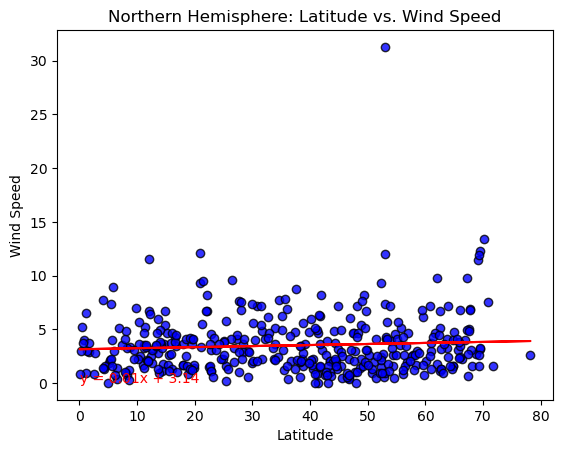

In [58]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Wind Speed"],
                       "Latitude",
                       "Wind Speed",
                       "Northern Hemisphere: Latitude vs. Wind Speed")

The r2-value is: 0.03471500630049757


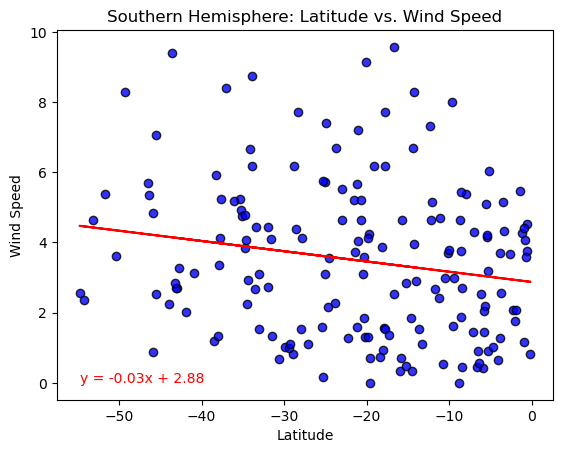

In [60]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Wind Speed"],
                       "Latitude",
                       "Wind Speed",
                       "Southern Hemisphere: Latitude vs. Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE